In [1]:
## Influence of Elon Musk's Tweets About Dogecoin on Dogecoin Prices

In [2]:
# Packages used

# Dataframe Analyses
import pandas as pd 

# Plotting the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
import datetime

In [3]:
# Reading the data
doge = pd.read_csv('https://raw.githubusercontent.com/ridhima-singh/dogecoin/main/DOGE-USD_1.csv')
doge

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
...,...,...,...,...,...,...,...
1516,2022-01-03,0.174406,0.174406,0.168271,0.170088,0.170088,505900382
1517,2022-01-04,0.170151,0.172339,0.168128,0.168803,0.168803,541922892
1518,2022-01-05,0.168835,0.170747,0.151898,0.159420,0.159420,994086848
1519,2022-01-06,0.159436,0.161706,0.155142,0.160213,0.160213,715345645


In [4]:
# Removed unnessecary variables
doge = doge.drop(["Low", "Close", "Adj Close", "Volume"], axis=1)
doge

,Date,Open,High
0,2017-11-09,0.001207,0.001415
1,2017-11-10,0.001421,0.001431
2,2017-11-11,0.001146,0.001257
3,2017-11-12,0.001189,0.001210
4,2017-11-13,0.001046,0.001212
...,...,...,...
1516,2022-01-03,0.174406,0.174406
1517,2022-01-04,0.170151,0.172339
1518,2022-01-05,0.168835,0.170747
1519,2022-01-06,0.159436,0.161706


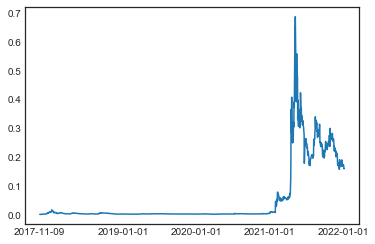

In [5]:
# Basic data visualization
fig, ax = plt.subplots()

ax.plot(doge["Date"], doge["Open"])

ax.set_xticks([doge["Date"][0], doge["Date"][418], doge["Date"][783], doge["Date"][1149], doge["Date"][1514]])

In [6]:
# Dates on which Musk tweeted about Dogecoin as well as how many times he tweeted that day
dates = ["2021-01-21", "2021-02-04", "2021-02-05", "2021-02-07", "2021-02-10", "2021-02-11", "2021-02-14", "2021-02-21", 
         "2021-02-24", "2021-03-01", "2021-03-05", "2021-03-13", "2021-06-25", "2021-07-01", "2021-07-02", "2021-07-25"]
frequency = [1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1]

In [7]:
# Created a dataframes that displayed the opening and high prices for each day on which Musk tweeted, 
# as well as the opening and high prices for the day before and the day after 

df_tweets = pd.DataFrame()
df_after = pd.DataFrame()
df_before = pd.DataFrame() 

In [8]:
# Added each day's Dogecoin prices to their respectice dataframes
list1  = []
for i in range(16):
    prevdate = dates[i][0:9]+str(int(dates[i][9])-1) # day before he tweeted
    date = dates[i] # day on which he tweeted
    nextdate = dates[i][0:9]+str(int(dates[i][9])+1) # day after he tweeted
    list1.append(nextdate)
    
    # Fixed weirdly formatted dates
    if prevdate == "2021-02-1-1":
        prevdate = "2021-02-09"
    elif prevdate == "2021-03-00":
        prevdate = "2021-02-28"
    elif prevdate == "2021-07-00":
        prevdate = "2021-06-30"
    
    df_tweets = df_tweets.append(doge.loc[doge["Date"] == date]) 
    df_after = df_after.append(doge.loc[doge["Date"] == nextdate])
    df_before = df_before.append(doge.loc[doge["Date"] == prevdate])

In [9]:
#Re-indexed and combined the three dataframes    
df_tweets["Number"] = frequency
df_tweets = df_tweets.set_index(pd.Series(range(16)))
df_after = df_after.set_index(pd.Series(range(16)))
df_before = df_before.set_index(pd.Series(range(16)))

df = pd.concat([df_tweets, df_after, df_before], axis=1)
df.columns = ["tweet_date", "open", "high", "tweets", "nextday", "nextdayopen", "nextdayhigh", "prevday", "prevdayopen", "prevdayhigh"]
df

,tweet_date,open,high,tweets,nextday,nextdayopen,nextdayhigh,prevday,prevdayopen,prevdayhigh
0,2021-01-21,0.009062,0.009089,1,2021-01-22,0.008165,0.008769,2021-01-20,0.009096,0.009153
1,2021-02-04,0.037226,0.057869,4,2021-02-05,0.053043,0.053740,2021-02-03,0.031493,0.039105
2,2021-02-05,0.053043,0.053740,1,2021-02-06,0.046931,0.058308,2021-02-04,0.037226,0.057869
3,2021-02-07,0.057502,0.084357,3,2021-02-08,0.078352,0.084945,2021-02-06,0.046931,0.058308
4,2021-02-10,0.070111,0.081091,1,2021-02-11,0.072844,0.074301,2021-02-09,0.078773,0.083128
5,2021-02-11,0.072844,0.074301,1,2021-02-12,0.069650,0.072610,2021-02-10,0.070111,0.081091
6,2021-02-14,0.066448,0.066448,1,2021-02-15,0.062568,0.063924,2021-02-13,0.070025,0.071646
7,2021-02-21,0.054369,0.058428,1,2021-02-22,0.056044,0.060466,2021-02-20,0.055132,0.060286
8,2021-02-24,0.047414,0.059873,1,2021-02-25,0.056615,0.057808,2021-02-23,0.053698,0.053768
9,2021-03-01,0.048070,0.051479,1,2021-03-02,0.050596,0.052382,2021-02-28,0.050097,0.050134


In [10]:
# Differences in opening and high values between the day he tweeted and the previous day
diff_high_prev = df["high"] - df["prevdayhigh"]
diff_open_prev = df["open"] - df["prevdayopen"]

# Differences in opening and high values between the day he tweeted and the next day
diff_high_next = df["nextdayhigh"] - df["high"]
diff_open_next = df["nextdayopen"] - df["open"]

In [11]:
# Created a dataframe with the differences in opening and high prices
df_diff = pd.DataFrame()
df_diff["Date"] = df["tweet_date"]
df_diff["Tweets"] = frequency

# Previous day differences
df_diff["Previous Day Opening"] = diff_open_prev
df_diff["Previous Day High"] = diff_high_prev
# Previous day differences per tweet, since on some days he tweeted about Dogecoin multiple times
df_diff["Prev Open Price per tweet"] = df_diff["Previous Day Opening"] / df_diff["Tweets"]
df_diff["Prev High Price per tweet"] = df_diff["Previous Day High"] / df_diff["Tweets"]

# Next day differences
df_diff["Next Day Opening"] = diff_open_next
df_diff["Next Day High"] = diff_high_next
# Next day differences per tweet, since on some days he tweeted about Dogecoin multiple times
df_diff["Next Open Price per tweet"] = df_diff["Next Day Opening"] / df_diff["Tweets"]
df_diff["Next High Price per tweet"] = df_diff["Next Day High"] / df_diff["Tweets"]

df_diff

,Date,Tweets,Previous Day Opening,Previous Day High,Prev Open Price per tweet,Prev High Price per tweet,Next Day Opening,Next Day High,Next Open Price per tweet,Next High Price per tweet
0,2021-01-21,1,-0.000034,-0.000064,-0.000034,-0.000064,-0.000897,-0.000320,-0.000897,-0.000320
1,2021-02-04,4,0.005733,0.018764,0.001433,0.004691,0.015817,-0.004129,0.003954,-0.001032
2,2021-02-05,1,0.015817,-0.004129,0.015817,-0.004129,-0.006112,0.004568,-0.006112,0.004568
3,2021-02-07,3,0.010571,0.026049,0.003524,0.008683,0.020850,0.000588,0.006950,0.000196
4,2021-02-10,1,-0.008662,-0.002037,-0.008662,-0.002037,0.002733,-0.006790,0.002733,-0.006790
5,2021-02-11,1,0.002733,-0.006790,0.002733,-0.006790,-0.003194,-0.001691,-0.003194,-0.001691
6,2021-02-14,1,-0.003577,-0.005198,-0.003577,-0.005198,-0.003880,-0.002524,-0.003880,-0.002524
7,2021-02-21,1,-0.000763,-0.001858,-0.000763,-0.001858,0.001675,0.002038,0.001675,0.002038
8,2021-02-24,1,-0.006284,0.006105,-0.006284,0.006105,0.009201,-0.002065,0.009201,-0.002065
9,2021-03-01,1,-0.002027,0.001345,-0.002027,0.001345,0.002526,0.000903,0.002526,0.000903


In [12]:
# Average value of the difference in opening prices between the day he tweeted and the previous day
sum(df_diff["Prev Open Price per tweet"]) / 16

0.0011049010416666677

In [13]:
# Average value of the difference in opening prices between the day he tweeted and the previous day
sum(df_diff["Prev High Price per tweet"]) / 16

0.00028731249999999916

In [14]:
# Average value of the difference in opening prices between the day he tweeted and the previous day
sum(df_diff["Next Open Price per tweet"]) / 16

-0.0009038750000000032

In [15]:
# Average value of the difference in opening prices between the day he tweeted and the previous day
sum(df_diff["Next High Price per tweet"]) / 16

-0.0006594843749999964